# B - Décorateurs
## 1. Les Décorateurs
Un décorateur en Python peut être vu comme une fonction qui modifie le comportement d'autres fonctions.
En général, on utilise les décorateurs lorsqu'on veut ajouter un certain code à plusieurs fonctions, sans avoir à modifier ces dernières.

Pour appliquer un décorateur à une fonction, on précède la ligne de définition de cette dernière par une ligne comportant un @ puis le nom du décorateur.

Exemple d'implémentation: On cherche un moyen d'introduire les fonctions par leur nom au moment de leur exécution.

def print_before_execution(function):
   def print_then_execute(*args, **kwargs):
       print('voici ce que renvoie la fonction {}'.format(function.__name__))
       function(*args, **kwargs)
   return print_then_execute

@print_before_execution
def print_hello_world():
    print("hello world")
print_hello_world()

Le résultat renvoyé est le suivant

>>> voici ce que renvoie la fonction print_hello_world
    hello world
    
a- Construire un décorateur nommé affiche_doc qui affiche la documentation d'une fonction avant de retourner cette dernière.

   La documentation d'une fonction peut être renvoyée avec fonction.doc

In [1]:
def affiche_doc(function):
    def print_doc(*args, **kwargs):
        print(function.__doc__)
        return function(*args, **kwargs)
    return print_doc

Lancer la cellule de code suivante pour tester votre décorateur

In [2]:
import pandas as pd

@affiche_doc
def importer_csv(*args, **kwargs):
    '''
    Fonction qui permet d'importer un fichier csv dans un DataFrame pandas.
    '''
    return pd.read_csv(*args, **kwargs)

importer_csv('D:/data/csv/adult.csv', sep=';')


    Fonction qui permet d'importer un fichier csv dans un DataFrame pandas.
    


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,60,Self-emp-not-inc,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
1,40,Private,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,18,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
3,80,Self-emp-not-inc,7th-8th,4,Never-married,Farming-fishing,Unmarried,White,Male,0,0,20,United-States,<=50K
4,30,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
5,44,Private,Bachelors,13,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,56,United-States,<=50K
6,18,Private,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States,<=50K
7,37,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
8,32,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,5178,0,45,United-States,>50K
9,22,Private,HS-grad,9,Never-married,Machine-op-inspct,Other-relative,Black,Male,0,0,1,United-States,<=50K


On utilise souvent les décorateurs pour afficher le temps d'exécution d'une fonction sans avoir à modifier son code.

b- Construire un décorateur nommé temps_execution qui affiche le temps qu'une fonction a mis pour s'exécuter.
Pour rappel, on utilise le module time pour mesurer le temps d'exécution d'une fonction :

import time

heure_debut = time.time()
ma_fonction()
heure_fin = time.time()

temps_execution = heure_fin - heure_debut

In [3]:
import time

def temps_execution(function):
    def timer(*args, **kwargs):
        heure_debut = time.time()
        results = function(*args, **kwargs)
        heure_fin = time.time()
        temps = heure_fin - heure_debut
        print("Cette fonction s'est exécutée en {} s".format(temps))
        return results
    return timer

Lancer la cellule de code suivante pour tester votre décorateur

In [4]:
@temps_execution
def importer_csv(*args, **kwargs):
    '''
    Fonction qui permet d'importer un fichier csv dans un DataFrame pandas.
    '''
    return pd.read_csv(*args, **kwargs)

importer_csv('D:/data/csv/adult.csv', sep=';')

Cette fonction s'est exécutée en 0.002995729446411133 s


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,60,Self-emp-not-inc,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
1,40,Private,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,18,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
3,80,Self-emp-not-inc,7th-8th,4,Never-married,Farming-fishing,Unmarried,White,Male,0,0,20,United-States,<=50K
4,30,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
5,44,Private,Bachelors,13,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,56,United-States,<=50K
6,18,Private,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States,<=50K
7,37,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
8,32,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,5178,0,45,United-States,>50K
9,22,Private,HS-grad,9,Never-married,Machine-op-inspct,Other-relative,Black,Male,0,0,1,United-States,<=50K


## 2. Paramétrer un décorateur
On peut paramétrer le comportement d'un décorateur de la même manière qu'on paramètre celui d'une fonction.
Un décorateur paramétré est en fait une fonction qui retourne un décorateur simple.

def decorateur_parametre(description): 
    def decorateur(function): 
        def print_before_execution(*args, **kwargs): 
            print(description.format(function.__name__))
            function(*args, **kwargs)
        return print_before_execution
    return decorateur

@decorateur_parametre('voici ce que renvoie la fonction {}')
def print_hello_world():
    print('hello world')
print_hello_world()

Le résultat renvoyé est le suivant

>>> voici ce que renvoie la fonction print_hello_world
    hello world
    
a- Construire un décorateur nommé entree_contient qui prend en paramètre une chaîne de caractère a_contenir.

Si a_contenir est incluse dans le premier argument de la fonction décorée, alors cette dernière s'exécute normalement.
Sinon, un message d'erreur doit être renvoyé.

In [5]:
def entree_contient(a_contenir):
    def decorator(function): 
        def new_function(*args, **kwargs): 
            if a_contenir in str(args[0]):
                return function(*args, **kwargs)
            else:
                return "la première entrée doit contenir {}".format(a_contenir)
        return new_function
    return decorator

Lancer les cellules de code suivantes pour tester votre décorateur

In [6]:
@entree_contient('.csv')
def importer_csv(*args, **kwargs):
    '''
    Fonction qui permet d'importer un fichier csv dans un DataFrame pandas.
    '''
    return pd.read_csv(*args, **kwargs)

In [7]:
importer_csv('D:/data/csv/adult', sep=';')  # on oublie l'extension .csv volontairement pour ce test

'la première entrée doit contenir .csv'

## 3. Enchaîner les décorateurs

In [8]:
""" Suite leçon = commentaire = Ne Pas Lancer ! """

Il est tout à fait possible d affecter plusieurs décorateurs à une fonction pour accumuler leurs effets.

def print_before_execution(function):
    def print_then_execute(*args, **kwargs):
        print('voici ce que renvoie la fonction {}'.format(function.__name__))
        function(*args, **kwargs)
    return print_then_execute

def print_after_execution(function):
    def execute_then_print(*args, **kwargs):
        function(*args, **kwargs)
        print('La fonction a fini de tourner')
    return execute_then_print

@print_after_execution
@print_before_execution
def print_hello_world():
    print('hello world')

print_hello_world()
Le résultat renvoyé est le suivant

>>> voici ce que renvoie la fonction print_hello_world
    hello world
    La fonction a fini de tourner
    
    
En fait, @print_before_execution s applique à la fonction print_hello_world, puis @print_after_execution s applique à la fonction renvoyée par @print_before_execution.
ATTENTION, l ordre dans lequel on applique les décorateurs est important!

@print_before_execution
@print_after_execution
def print_hello_world():
    print('hello world')

print_hello_world()
Renvoie

>>> voici ce que renvoie la fonction print_after_execution  
    # @print_before_execution s'applique à la fonction renvoyée par @print_after_execution
    hello world
    La fonction a fini de tourner
    
    
a- Enchaîner les décorateurs temps_execution et entree_contient créés dans les parties précédentes. On reprendra le code de la fonction importer_csv.

SyntaxError: invalid syntax (2979779776.py, line 3)

In [9]:
@entree_contient('.csv')
@temps_execution
def importer_csv(*args, **kwargs):
    '''
    Fonction qui permet d'importer un fichier csv dans un DataFrame pandas.
    '''
    return pd.read_csv(*args, **kwargs)

# -> le @timer s'exécute puis @entree_contient('.csv')

## 4. Envelopper une fonction
Quand nous décorons une fonction comme dans les parties qui précèdent, nous perdons les informations annexes de la fonction (sa documentation par exemple).
Lancer la cellule de code suivante pour le voir par vous-même.

In [10]:
def print_before_execution(function):
    def print_then_execute(*args, **kwargs):
        print('voici ce que renvoie la fonction {}'.format(function.__name__))
        function(*args, **kwargs)
    return print_then_execute

@print_before_execution
def print_hello_world():
    '''
    Description de ma fonction
    '''
    print("hello world")
    
help(print_hello_world)

Help on function print_then_execute in module __main__:

print_then_execute(*args, **kwargs)



In [ ]:
""" bizarre ce résultat ...

## Fonction wraps
Pour remédier à ce problème, on enveloppe notre fonction à décorer à l'aide de wraps, qui retourne un décorateur lorsqu’appelé avec une fonction. wraps est disponible dans la librairie functools.

In [18]:
from functools import wraps

def print_before_execution(function):
    @wraps(function)
    def print_then_execute(*args, **kwargs):
        print('voici ce que renvoie la fonction {}'.format(function.__name__))
        function(*args, **kwargs)
    return print_then_execute

@print_before_execution
def print_hello_world():
    '''
    Description de ma fonction blablabla
    '''
    print("hello world")
    
help(print_hello_world)

Help on function print_hello_world in module __main__:

print_hello_world()
    Description de ma fonction blablabla



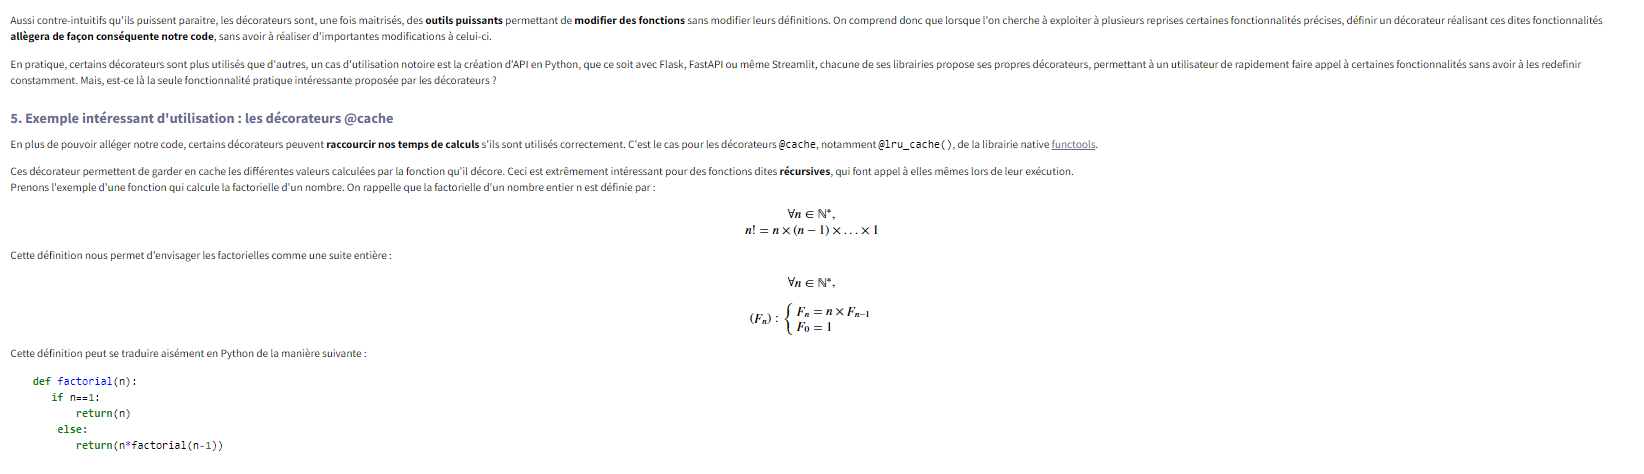

a- Implémentez la fonction factorial telle que définie plus haut.
b- Définissez une fonction boucle qui calculera et stockera dans une liste les factorielles de 1 à 500. Décorez cette fonction à l'aide du décorateur @temps_execution et exécutez là.

In [12]:
### Définition de la fonction factorielle
def factorial(n):
    if n==1:
        return(n)
    else:
        return(n*factorial(n-1))
    
### Définition de la boucle décorée
@temps_execution
def boucle(n=500):
    L=[]
    for k in range(1,n):
        L.append(factorial(k))
    return(L)

### Exécution         
boucle(100)   # pour 500 cela donne beaucoup trop de ligne ici !

Cette fonction s'est exécutée en 0.0009984970092773438 s


[1,
 2,
 6,
 24,
 120,
 720,
 5040,
 40320,
 362880,
 3628800,
 39916800,
 479001600,
 6227020800,
 87178291200,
 1307674368000,
 20922789888000,
 355687428096000,
 6402373705728000,
 121645100408832000,
 2432902008176640000,
 51090942171709440000,
 1124000727777607680000,
 25852016738884976640000,
 620448401733239439360000,
 15511210043330985984000000,
 403291461126605635584000000,
 10888869450418352160768000000,
 304888344611713860501504000000,
 8841761993739701954543616000000,
 265252859812191058636308480000000,
 8222838654177922817725562880000000,
 263130836933693530167218012160000000,
 8683317618811886495518194401280000000,
 295232799039604140847618609643520000000,
 10333147966386144929666651337523200000000,
 371993326789901217467999448150835200000000,
 13763753091226345046315979581580902400000000,
 523022617466601111760007224100074291200000000,
 20397882081197443358640281739902897356800000000,
 815915283247897734345611269596115894272000000000,
 33452526613163807108170062053440751

Dans notre exemple, la fonction en elle-même ne prend pas plus de 0.07 secondes à s'exécuter, on peut s'imaginer que pour davantage de factorielles à calculer, ce temps peut devenir non-négligeable. Voyons comment on peut améliorer la performance de notre code à l'aide du décorateur @lru_cache() si l'on décore la fonction factorial avec ce dernier.

c- Décorez la fonction factorial avec @lru_cache(). Ré-exécutez la fonction boucle et observez. N'oubliez pas d'importer le décorateur à partir du module functools.

In [13]:
from functools import lru_cache
@lru_cache()
def factorial(n):
    if n==1:
        return(n)
    else:
        return(n*factorial(n-1))

boucle(100)

Cette fonction s'est exécutée en 0.0 s


[1,
 2,
 6,
 24,
 120,
 720,
 5040,
 40320,
 362880,
 3628800,
 39916800,
 479001600,
 6227020800,
 87178291200,
 1307674368000,
 20922789888000,
 355687428096000,
 6402373705728000,
 121645100408832000,
 2432902008176640000,
 51090942171709440000,
 1124000727777607680000,
 25852016738884976640000,
 620448401733239439360000,
 15511210043330985984000000,
 403291461126605635584000000,
 10888869450418352160768000000,
 304888344611713860501504000000,
 8841761993739701954543616000000,
 265252859812191058636308480000000,
 8222838654177922817725562880000000,
 263130836933693530167218012160000000,
 8683317618811886495518194401280000000,
 295232799039604140847618609643520000000,
 10333147966386144929666651337523200000000,
 371993326789901217467999448150835200000000,
 13763753091226345046315979581580902400000000,
 523022617466601111760007224100074291200000000,
 20397882081197443358640281739902897356800000000,
 815915283247897734345611269596115894272000000000,
 33452526613163807108170062053440751

À stocker les valeurs en cache, on gagne du temps sur l'exécution de notre fonction. Voyons un nouvel exemple plus flagrant.

d- Définissez une nouvelle fonction print_hello qui retournera au bout de 5 secondes une chaine de caractère valant par défaut 'hello'. Décorez la avec @lru_cache() et @temps_execution puis exécutez-là sans préciser d'argument.
e- Stockez la valeur retournée dans une variable a quelconque.

In [14]:
@temps_execution
@lru_cache()
def print_hello(a='hello'):
    time.sleep(5)
    return a

a=print_hello()

Cette fonction s'est exécutée en 5.011325836181641 s


Comme prévu, la fonction met environ 5 secondes à s'exécuter. Mais la valeur calculée reste stockée en cache, pour vous en rendre compte, définissez une nouvelle variable b qui stockera une nouvelle itération de la fonction print_hello et constatez le changement.

In [15]:
b= print_hello()  # -> Cette fonction s'est exécutée en 1.1920928955078125e-06 s chez DS

Cette fonction s'est exécutée en 0.0 s


Cette fois-ci, l'exécution a été quasi-instantanée et la mise en cache a permis de court-circuiter le temps d'attente de 5 secondes prévu par la fonction lors de sa seconde itération. On peut légitimement penser que la mise en cache n'est pas responsable de ce gain de temps, vous pouvez exécuter la cellule suivante pour vous rendre compte du contraire.

In [16]:
@temps_execution
def print_hello(a='hello'):
    time.sleep(5)
    return a

a= print_hello()
b= print_hello()

Cette fonction s'est exécutée en 5.011108160018921 s
Cette fonction s'est exécutée en 5.012053489685059 s


## Conclusion
> >

Les décorateurs sont des outils qui s'apparentent à des fonctions et qui permettent de modifier le comportement d'autres fonctions.
Ces décorateurs se paramètrent comme n'importe quelle autre fonction, permettant une grande flexibiltié d'exploitation.
Outre un aspect pratique évident, certains décorateurs tels que les décorateurs @cache permettent même d'optimiser le code afin d'économiser un temps de calcul non-négligeable.

# C - Multi-Threading et Mutlti-Processing

-> video de "Formation Video" https://www.youtube.com/watch?v=vdjZvxAI5d4&t=219s

### a - Threading prog Asynchrone : instancier-démarrer-joindre

In [17]:
""" 1 - programme séquentiel  = lecture et lancement des méthodes un après l'autre + PROGRAMMATION SYNCHRONE """

import time

def process_one():
    i = 0
    while i < 3:
        print("oooooooooooo")
        time.sleep(0.3)
        i += 1
        
def process_two():
    i = 0
    while i < 3:
        print("xxxxxxxxxxxx")   # on print autre chose pour marquer la différence entre les 2 def
        time.sleep(0.3)
        i += 1
        
process_one()
process_two()

oooooooooooo
oooooooooooo
oooooooooooo
xxxxxxxxxxxx
xxxxxxxxxxxx
xxxxxxxxxxxx


In [ ]:
# on voit que process_one tourne en 1er, puis quand il est fini, le process_two est lancé
# => en raison de la procédure séquentielle

In [18]:
""" 2 - programme en threading = lancement en parallèle des procédures = programmation ASYNCHRONE """

import time
# import threading   # module à importer
from threading import Thread    # autre solution que je préfère pour éviter d'écrire threading.Thread() ensuite


def process_one():
    i = 0
    while i < 3:
        print("oooooooooooo")
        time.sleep(0.3)
        i += 1
        
def process_two():
    i = 0
    while i < 3:
        print("xxxxxxxxxxxx")   # on print autre chose pour marquer la différence entre les 2 def
        time.sleep(0.3)
        i += 1

# on instancie les threads
th1 = Thread(target=process_one)  # on instancie un objet de class thread pour le 1er processus
th2 = Thread(target=process_two) # on instancie tous les autre processus à lancer en //

# on démarre les threads
th1.start()  # on doit ensuite démarrer les thread ( peu impport l'ordre th1 ou th2 )
th2.start()

# mais les threads ont besoin de bloquer l'exécution séquentielle du programme ( ici on fait un print de Fin de prog pour tester )!!

# on joint les threads pour qu'il s'attendent
th1.join()
th2.join()  # le join() ici permet que les thread s'attendent les uns les autres avant de poursuivre la séquence du programme

print("Fin de Programme !")   # print de test de fin de prog, séquentiel ici, qui doit s'afficher après l'exécution des threads

oooooooooooo
xxxxxxxxxxxx
oooooooooooo
xxxxxxxxxxxx
oooooooooooo
xxxxxxxxxxxx
Fin de Programme !


In [ ]:
""" si le spleep est le meme ( ici 0.3 et 0.4 ) alors il peut y avoir un chevauchement à l'affichage 
avec ooooooooooooxxxxxxxxxxxx """

La Programmation Asynchrone est utile par exemple pour les jeux video, où mouvement du personnage doit tourner en meme temps que la musique ou l'activation d'objets par exemple

### b - Héritage et Surcharge des Méthodes 

In [19]:
import threading  # on importe le module total car on a besoin de plusieurs méthodes
import time

class MyProcess(threading.Thread):    # on met le nom de la class mère (ici threading.Thread) dans la class MyProcess = class fille
    def __int__ (self):        # on surcharge le constructeur
        Thread.__int__(self)        # on initialise le constructeur de la class mère
        
    def run(self):   # la class Thread a une méthode run pour le traitement, que l'on surcharge par notre méthode run a nous
        i = 0
        while i < 3:
            print(threading.current_thread())  
            time.sleep(0.3)
            i += 1

            
# on instancie les threads par notre class cette fois-ci ( les instance héritent de Tthreading.thread mère )
th1 = MyProcess(name="thread1")
th2 = MyProcess(name="thread2")  # je nomme ici car sinon le thread choisit un nom aléatoire ( thread-15 et thread-16 vu sinon )
            
# on démarre les threads
th1.start()  
th2.start()

# on joint les threads pour qu'il s'attendent
th1.join()
th2.join()  

print("Fin de Programme !") 

<MyProcess(thread1, started 12160)>
<MyProcess(thread2, started 11024)>
<MyProcess(thread1, started 12160)><MyProcess(thread2, started 11024)>

<MyProcess(thread2, started 11024)><MyProcess(thread1, started 12160)>

Fin de Programme !


### c- verrouiller le threading pour les cas critiques


In [ ]:
# par exemple pour ne pas mélanger les impressions de feuille de plusieurs users 
# si c'est "critique" et ici oui, on prend possession du traitement // et on impose un ordre

In [20]:
import threading  # on importe le module total car on a besoin de plusieurs méthodes
import time

# my_lock = threading.RLock()        # on créé un verrou
""" sans verrou ici pour voir """

class MyProcess(threading.Thread):    # on met le nom de la class mère (ici threading.Thread) dans la class MyProcess = class fille
    def __int__ (self):        # on surcharge le constructeur
        Thread.__int__(self)        # on initialise le constructeur de la class mère
        
    def run(self):   # la class Thread a une méthode run pour le traitement, que l'on surcharge par notre méthode run a nous
        i = 0
        while i < 3:
            letters = "ABC"
            
            for lt in letters:   # on demande ici d'afficher 1 lettre, 1 à 1 de letters
                print(lt)
                time.sleep(0.3)
            i += 1

            
# on instancie les threads par notre class cette fois-ci ( les instance héritent de Tthreading.thread mère )
th1 = MyProcess(name="thread1")
th2 = MyProcess(name="thread2")  # je nomme ici car sinon le thread choisit un nom aléatoire ( thread-15 et thread-16 vu sinon )
            
# on démarre les threads
th1.start()  
th2.start()

# on joint les threads pour qu'il s'attendent
th1.join()
th2.join()  

print("Fin de Programme !") 

AA

BB

CC

AA

BB

CC

AA

BB

CC

Fin de Programme !


In [21]:
import threading  # on importe le module total car on a besoin de plusieurs méthodes
import time

my_lock = threading.RLock()        # on créé un verrou
""" AVEC verrou ici pour voir 
    on met notre process critique dans une boucle with avec my_lock !!!   """

class MyProcess(threading.Thread):    # on met le nom de la class mère (ici threading.Thread) dans la class MyProcess = class fille
    def __int__ (self):        # on surcharge le constructeur
        Thread.__int__(self)        # on initialise le constructeur de la class mère
        
    def run(self):   # la class Thread a une méthode run pour le traitement, que l'on surcharge par notre méthode run a nous
        i = 0
        while i < 3:
            with my_lock:         
                letters = "ABC"

                for lt in letters:   # on demande ici d'afficher 1 lettre, 1 à 1 de letters
                    print(lt)
                    time.sleep(0.3)
            i += 1

            
# on instancie les threads par notre class cette fois-ci ( les instance héritent de Tthreading.thread mère )
th1 = MyProcess(name="thread1")
th2 = MyProcess(name="thread2")  # je nomme ici car sinon le thread choisit un nom aléatoire ( thread-15 et thread-16 vu sinon )
            
# on démarre les threads
th1.start()  
th2.start()

# on joint les threads pour qu'il s'attendent
th1.join()
th2.join()  

print("Fin de Programme !") 

A
B
C
A
B
C
A
B
C
A
B
C
A
B
C
A
B
C
Fin de Programme !


In [ ]:
""" peu importe quel thread démarre en 1er, il se termine avant qu'un autre thread soit lancé """

## Multithreading et multiprocessing (DS)
### 1. Définitions 
Pour optimiser le temps d’exécution d'un programme il est souvent pertinent d'avoir recours à la programmation concurrente ou parallèle plutôt que séquentielle. Au sein de ce notebook, nous allons passer en revue ces concepts et proposer quelques implémentations sur Python.

Eléments essentiels 
  Un processeur (ou CPU pour Central Processing Unit), est l’un des composants électroniques essentiels que l’on trouve dans nos ordinateurs et qui se charge de l’exécution d’instructions qui lui sont données. Un processeur est principalement défini par 2 caractéristiques : Sa fréquence et son nombre de cœurs. La fréquence associée au processeur correspond au nombre de cycles qu’il est capable de réaliser par seconde. Un processeur peut avoir un ou plusieurs cœurs qui correspondent à des unités de calcul. Un processeur multicoeur pourra exécuter plusieurs tâches simultanément, si ces tâches le permettent, en répartissant les tâches par cœur disponible.
  La RAM pour Random Access Memory correspond à la mémoire vive d'un ordinateur. C'est un espace de stockage temporaire. Le système accède à cette mémoire de façon instantanée ce qui permet la fluidité de l'interface.
Processus et thread 
On appelle processus un programme autrement dit un ensemble d'instructions qui est en cours d'exécution. L'ensemble des instructions d'un programme est stocké sur la RAM de telle sorte à ce que le processeur puisse comprendre ces instructions. A partir de la RAM, le processeur va donc exécuter chaque instruction. On parle de cycle "fetch-execute", cela signie que le processeur cherche l'instruction puis l'exécute. Il est important de noter que chaque processus est indépendant des autres existants.

Un thread est une sous-partie de processus et correspond à un fil d'exécution d'instructions. Ainsi un processus pourra être composé d'un ou plusieurs threads, qui seront exécutés de façon parallèle ou concurrente.

Processus et threads sont ainsi des notions très proches mais elles diffèrent sur des éléments clés. Chaque processus dispose d'un espace mémoire propre qui lui est alloué. A contrario, tous les threads appartenant à un même processus partagent un espace mémoire. Ces propriétés concernant l'allocation de la mémoire influent notamment sur la communication et la rapidité de passage d'un processus ou thread à un autre. En effet, la communication entre threads sera par exemple moins coûteuse qu'une communication entre processus et il sera également plus rapide de passer d'un thread à un autre plutôt qu'un processus à un autre. Il est également à noter que la création d'un thread sera moins coûteuse en temps que la création d'un processus à cause de l'allocation de cet espace mémoire propre.

Exécution synchrone et asynchrone 
On parle d'exécution synchrone lorsqu'un programme est exécuté en séquentiel. Si l'on considère un fil d'instructions, alors l'exécution de chaque instruction est conditionnée à la fin de l'exécution de l'instruction précédente. Il est important de noter que les instructions portent ici un ordre. L'illustration ci-dessous illustre le fonctionnement en séquentiel.

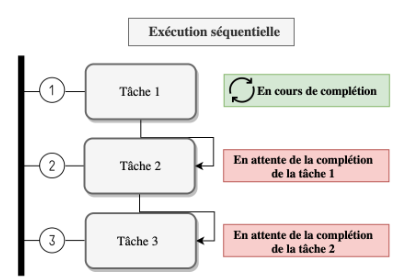

Dans cet exemple, le processus 2 attend la complétion du processus 1 pour démarrer. De même le processus 3 attend la complétion du processus 2 pour démarrer.

L'exécution asynchrone correspond au fait d'exécuter des nouvelles instructions alors que les instructions précédentes n'ont pas encore fini leur exécution : l'exécution d'une nouvelle instruction ne sera donc plus conditionnée à la complétion de l'instruction précédente. L'illustration ci-dessous illustre le fonctionnement en asynchrone.

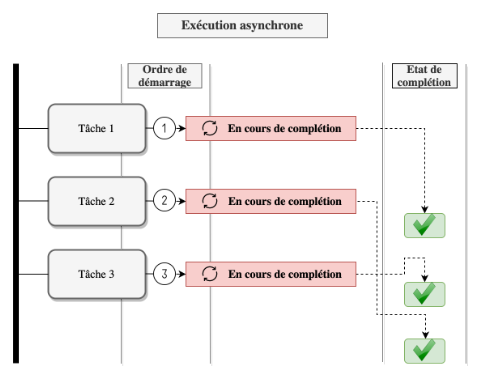

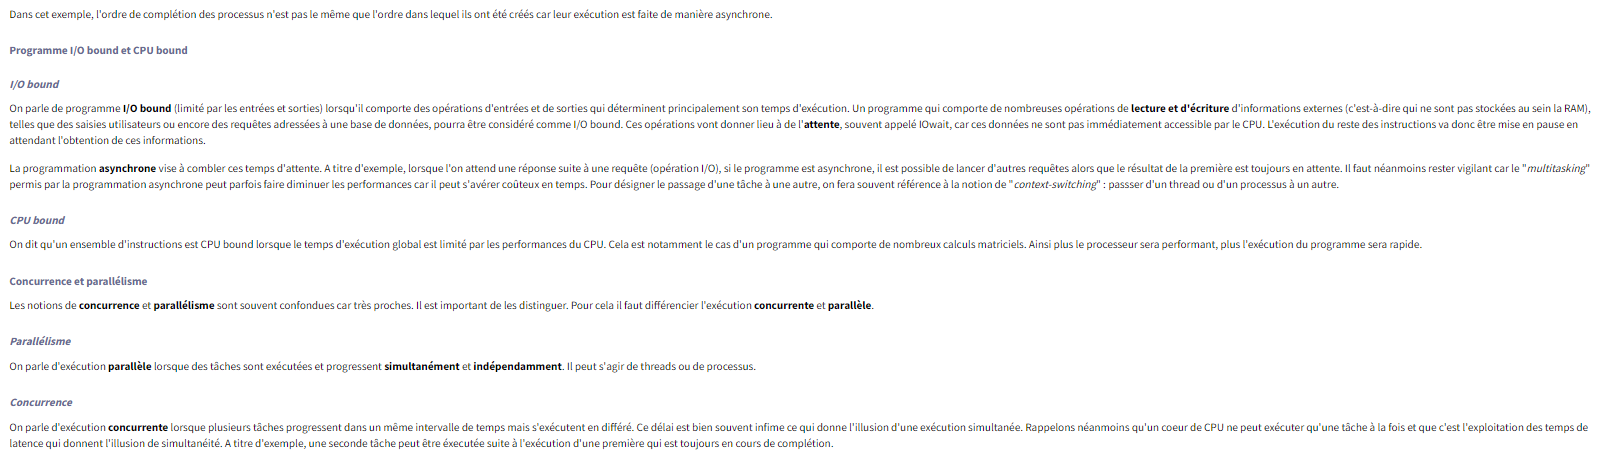

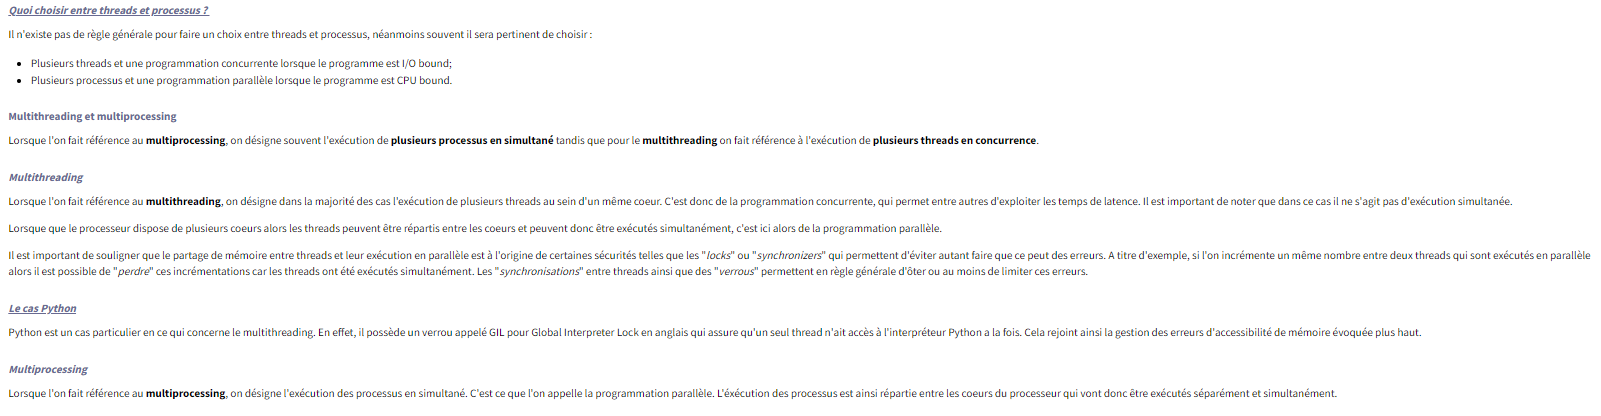

### 2. Implémentation sur Python 
Multithreading 
Les gains perçues suite à l'utilisation de plusieurs threads sont assez limités sur Python. La librairie multiprocessing peut se révéler être une solution car elle permet de contourner le GIL en créant des sous processus au lieu de threads ce qui permet ainsi de bénéficier de meilleures performances en exploitant les différents coeurs d'un processeur.

Dans l'implémention ci-dessous, on cherche tout de même à montrer le gain de temps potentiel obtenue suite à la création de threads. On montre ainsi que bien que limités par le GIL, des gains de temps peuvent tout de même être obtenues grâce à l'exploitation des temps de latence. Nous créons deux fonctions la première name qui demande à l'utilisateur de saisir le prénom Donna et qui retourne les prénoms Daniel et Donna. La deuxième fonction calcul effectue un calcul assez simple. Pour créer les threads nous utilisons la librairie threading et l'objet Thread().

(a) Exécutez la cellule ci-dessous et suivez les instructions de saisie.

In [23]:
from threading import Thread

import time

# Fonction name 
def name():
    time.sleep(10)
    name1="Daniel"
    name2=input("Ecrivez le prénom Donna: ")
    print(name1,"&",name2)

# Fonction calcul 

def calcul(x):
    x=x**1000000
    print(int(str(x)[:2])) # On affiche les deux premiers chiffres seulement
    
# Exécution en séquentiel 

t1=time.time() # On démarre la mesure du temps

name()          # On exécute la fonction name

calcul(5)       # On exécute la fonction calcul

t2=time.time() # On arrête la mesure du temps

print("\nLa complétion du programme en séquentiel prend : ", t2-t1,"\n")

# Exécution en threads

th1=Thread(target=name) # Premier thread avec la fonction name 

th2=Thread(target=calcul,args=(5,)) # Deuxième thread avec la fonction calcul 

t1=time.time() # On démarre la mesure du temps

th1.start()      # On démarre le thread 1

th2.start()      # On démarre le thread 2

th1.join()       # On s'assure de la complétion du thread 1

th2.join()       # On s'assure de la complétion du thread 2

t2=time.time() # On arrête la mesure du temps

print("\nLa complétion du programme divisé en threads prend : ", t2-t1)

Ecrivez le prénom Donna:  donna


Daniel & donna
10

La complétion du programme en séquentiel prend :  20.703807592391968 

10


Ecrivez le prénom Donna:  donna


Daniel & donna

La complétion du programme divisé en threads prend :  12.22118592262268


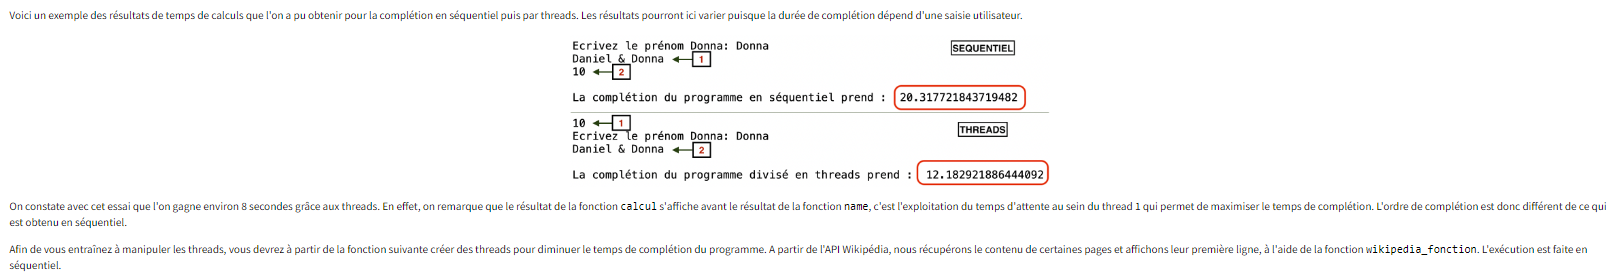

(b) Exécutez la cellule ci-dessous pour observer la durée de complétion du programme en séquentiel.

In [24]:
import wikipedia

import time

# On définit la langue de prédilection

wikipedia.set_lang("fr") 

# On définit une liste de titre de pages dont on souhaite obtenir le contenu

pages = ["Multithreading", "Threading", "Programmation_concurrente"]

# On définit une fonction qui retourne la première ligne de chaque page wikipédia 
# dont le nom apparaît dans la liste pages définit précédemment

def wikipedia_fonction(page):
    wiki = wikipedia.page(page)
    text = wiki.content
    print("\n",page,' : ',text.split('.', 1)[0],"\n")

t1=time.time() # On démarre la mesure du temps

# Lancement en séquentiel à l'aide d'une boucle

for page in pages:
    wikipedia_fonction(page) 

t2=time.time() # On arrête la mesure du temps

print (" \n Durée: ",(t2 - t1))


 Multithreading  :  Un processeur est dit multithread s'il est capable d'exécuter efficacement plusieurs threads simultanément 


 Threading  :  Hyper-threading (officiellement appelée Hyper-Threading Technology (HTT) ou  HT Technology (HT)) est la mise en œuvre par l'entreprise Intel du simultaneous multithreading (SMT) à deux voies dans ses microprocesseurs 


 Programmation_concurrente  :  La programmation concurrente est un paradigme de programmation tenant compte, dans un programme, de l'existence de plusieurs piles sémantiques qui peuvent être appelées threads, processus ou tâches 

 
 Durée:  2.1995627880096436


(c) Implémentez des threads pour exécuter le programme ci-dessus. Observe-t-on un gain de temps ?

In [25]:
# Solution

from threading import Thread

t1=time.time() # On demarre la mesure du temps

# On crée une liste de threads, le nombre de threads correspond au nombre de pages renseigné

threads = [Thread(target=wikipedia_fonction, args=(page,)) for page in pages] 

# On démarre les threads 

for thread in threads:
    thread.start()

# On s'assure de la complétion des threads

for thread in threads:
    thread.join()
    
t2=time.time() # On arrête la mesure du temps

print ("\n Durée:", (t2 - t1))

# Le temps d'exécution est fortement réduit ! 
# L'affichage des pages n'est pas dans le même ordre que décrit au sein de la liste pages
# On ne contrôle pas l'ordre de complétion des threads


 Threading  :  Hyper-threading (officiellement appelée Hyper-Threading Technology (HTT) ou  HT Technology (HT)) est la mise en œuvre par l'entreprise Intel du simultaneous multithreading (SMT) à deux voies dans ses microprocesseurs 


 Programmation_concurrente  :  La programmation concurrente est un paradigme de programmation tenant compte, dans un programme, de l'existence de plusieurs piles sémantiques qui peuvent être appelées threads, processus ou tâches 


 Multithreading  :  Un processeur est dit multithread s'il est capable d'exécuter efficacement plusieurs threads simultanément 


 Durée: 0.5000267028808594


### 3.Multiprocessing 
Afin d'illustrer la parallélisation de différents processus sur Python nous utilisons la librairie multiprocessing et l'objet Pool(). Nous créons dans un premier temps, une fonction assez coûteuse en temps de calcul, calcul_lourd, puis nous exécutons en séquentiel cette fonction pour différents arguments. Nous faisons la même chose en parallélisant l'exécution sur 4 coeurs.

(a) Exécutez la cellule ci-dessous.
   Le temps de d'exécution de la cellule ci-dessous est long (~ 5 minutes).

In [1]:
# il faudrait mettre cette focntion dans un autre fichier.py à importer
# pour éviter de mettre l'umport numpy dans la fonction !
import numpy as np   

# On définit la fonction calcul_lourd

def calcul_lourd(x): 
    import numpy as np
    resultat = 0
    for k in range(1, 50):
        resultat += x * np.power(x, 1 / k*np.power(k,3/2))
    return resultat





In [27]:
t1=time.time() # On démarre la mesure du temps

# On exécute la fonction pour différents arguments à la suite

calcul_lourd(range(1000000)) 
calcul_lourd(range(5000000))
calcul_lourd(range(4000000))
calcul_lourd(range(7000000))


t2=time.time() # On arrête la mesure du temps

print("La complétion du programme en séquentiel prend : ", t2-t1)

La complétion du programme en séquentiel prend :  215.24561977386475


In [ ]:
""" le module multiprocessing est connu pour des erreur d'attributs de multitraitement ( -> voir https://stackoverflow.com/questions/41385708/multiprocessing-example-giving-attributeerror )
il faut donc passer par le module multiprocess qui résoud ce PB et qui a aussi une méthode Pool
seulement on obtient alors une erreur sur np numpy non définit.....
et là la solution est d'incorporer "import numpy as np" dans notre fonction calcul_lourd   car ainsi on distribue numpy à chaque processeur ( -> https://stackoverflow.com/questions/38775754/multiprocessing-numpy-not-defined-error )
du coup voici  le code modifié pour que tout fonctionne : """

In [3]:
import multiprocess  # et non multiprocessing   
from multiprocess import Pool   # meme methode que from multiprocessing
import time

t1=time.time() # On démarre la mesure du temps

pool = Pool(4) # On crée les processus

# On répartit l'exécution entre les coeurs
resultat = pool.map(calcul_lourd,[range(1000),range(5000),range(4000),range(7000)])

t2=time.time() # On arrête la mesure du temps

print("\nLa complétion du programme en parallèle prend : ",t2-t1)


La complétion du programme en parallèle prend :  0.5484359264373779


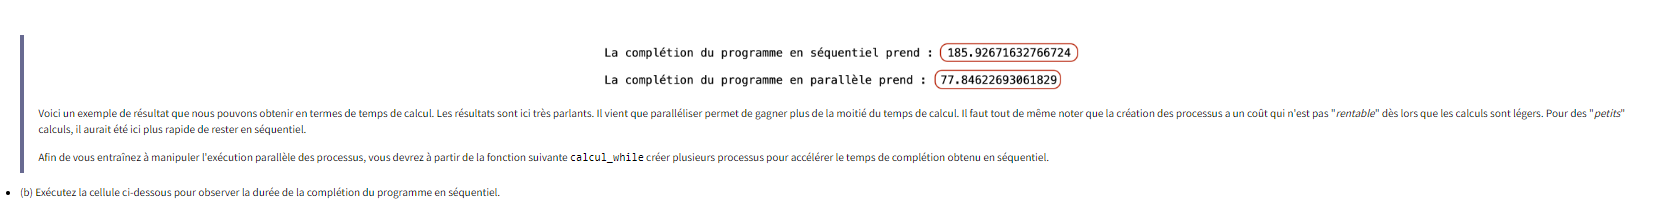

In [4]:
# On définit la fonction calcul_while
import time
def calcul_while(x): 
       while x>0:
            x-=1

# On définit la liste d'arguments

nombres=[5000000,3000000,6000000, 10000000]


In [5]:

t1=time.time() # On démarre la mesure du temps

# On exécute en séquentiel

for nb in nombres:
    calcul_while(nb)

t2=time.time() # On arrête la mesure du temps

print("Durée en séquentiel : ",t2-t1)

Durée en séquentiel :  1.6508398056030273


(c) Implémentez plusieurs processus pour exécuter le programme ci-dessus. Observe-t-on un gain de temps ?

In [11]:
# Solution n°1

t1=time.time() # On démarre la mesure du temps

pool = Pool(4) # On crée les processus 

# On répartit l'exécution entre les coeurs

resultat = pool.map(calcul_while,nombres) 

t2=time.time() # On arrête la mesure du temps

print("Durée de la solution 1 : ",t2-t1)





Durée de la solution 1 :  1.1036908626556396


In [12]:
# Solution n°2

# La syntaxe de la classe Process ressemble en tous points à celle de la classe Thread 
# de la librairie threading 

from multiprocess import Process

# On crée les processus

processes = [Process(target=calcul_while, args=(nb,)) for nb in nombres] 

t1=time.time() # On démarre la mesure du temps

if __name__ == '__main__':  # je ne vois à ça aucune utilité... à creuser si besoin !
    
    # On démarre les threads 
    for process in processes:
        process.start()
        
    # On s'assure de la complétion des threads
    for process in processes:
        process.join()

t2=time.time() # On arrête la mesure du temps

print("Durée de la solution 2 : ",t2-t1)

Durée de la solution 2 :  1.0220494270324707


In [13]:
__name__

'__main__'

In [14]:
from multiprocess import Process

# On crée les processus

processes = [Process(target=calcul_while, args=(nb,)) for nb in nombres] 

t1=time.time() # On démarre la mesure du temps


    
# On démarre les threads 
for process in processes:
    process.start()

# On s'assure de la complétion des threads
for process in processes:
    process.join()

t2=time.time() # On arrête la mesure du temps

print("Durée de la solution 2 : ",t2-t1)

Durée de la solution 2 :  1.1107828617095947


In [ ]:
# Les durées sont à peu près équivalentes entre les solutions.

# La classe Process et la classe Pool ne sont pas équivalentes.

# L'utilisation de la classe Pool sera plus appropriée à un grand nombre de tâches
# qui seront réparties entre les coeurs (nombre spécifié).

# La classe Process est plus appropriée à un nombre restreint de tâches.

# La durée de complétion est bien inférieure à celle obtenu avec une exécution en séquentiel.

-> Durée de la solution 1 :  13.943469047546387
Durée de la solution 2 :  13.914098262786865   chez DS

RIEN CHEZ MOI, LE KERNEL TOURNE EN VAIN SANS DONNER DE RESULTATS

### 4. Conclusion 
Le multithreading et le multiprocessing sont souvent des notions confondues, bien que dans les faits, bien différentes. L'exécution parallèle de threads est possible en règle générale bien que délicate compte tenu du partage de mémoire. Sur Python il n'est néanmoins possible d'exécuter qu'un seul thread à la fois à cause du GIL. Ainsi, lorsque l'on fait référence au multithreading, il s'agit la plupart du temps de programmation concurrente qui permet donc d'exploiter les temps de latence tandis que lorsque l'on fait référence au multiprocessing il s'agit de programmation parallèle qui permet de réaliser l'exécution de plusieurs processus en simultané .

# D - Fonctions asynchrones 

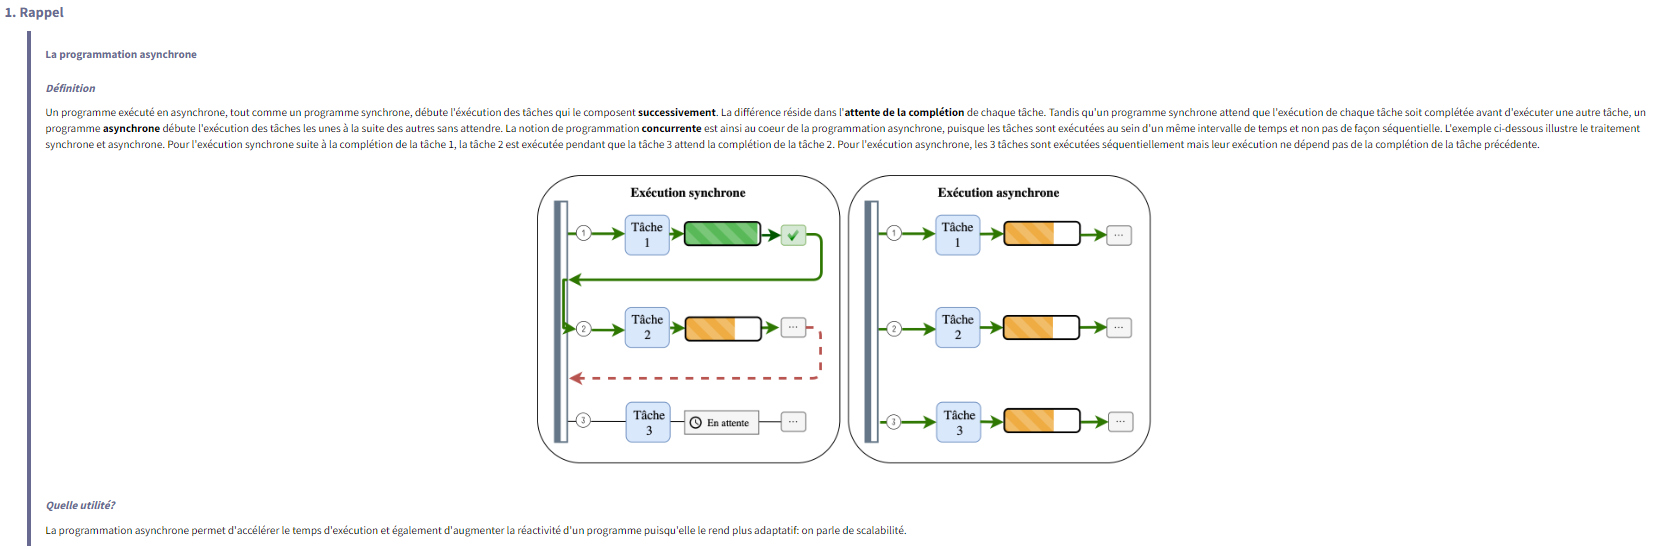

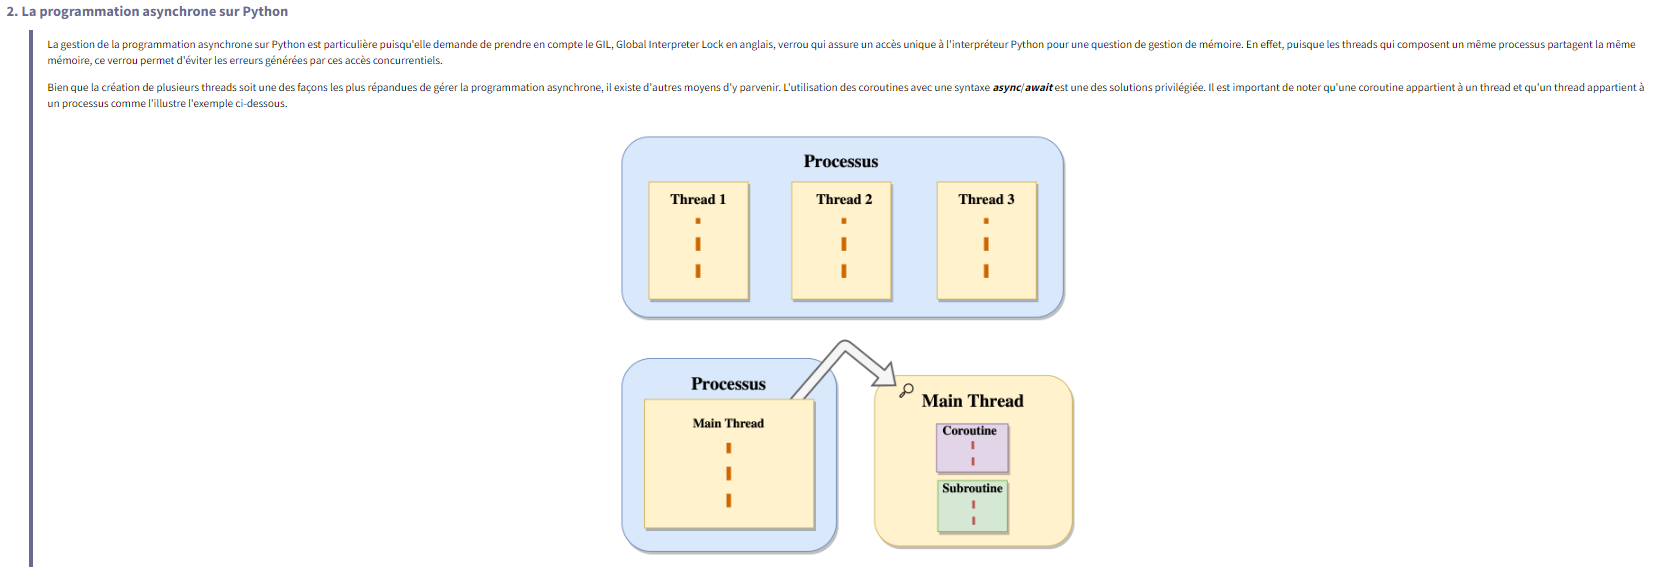

## GIL, Global Interpreter Lock 
## Pourquoi utiliser des coroutines plutôt que des threads? 

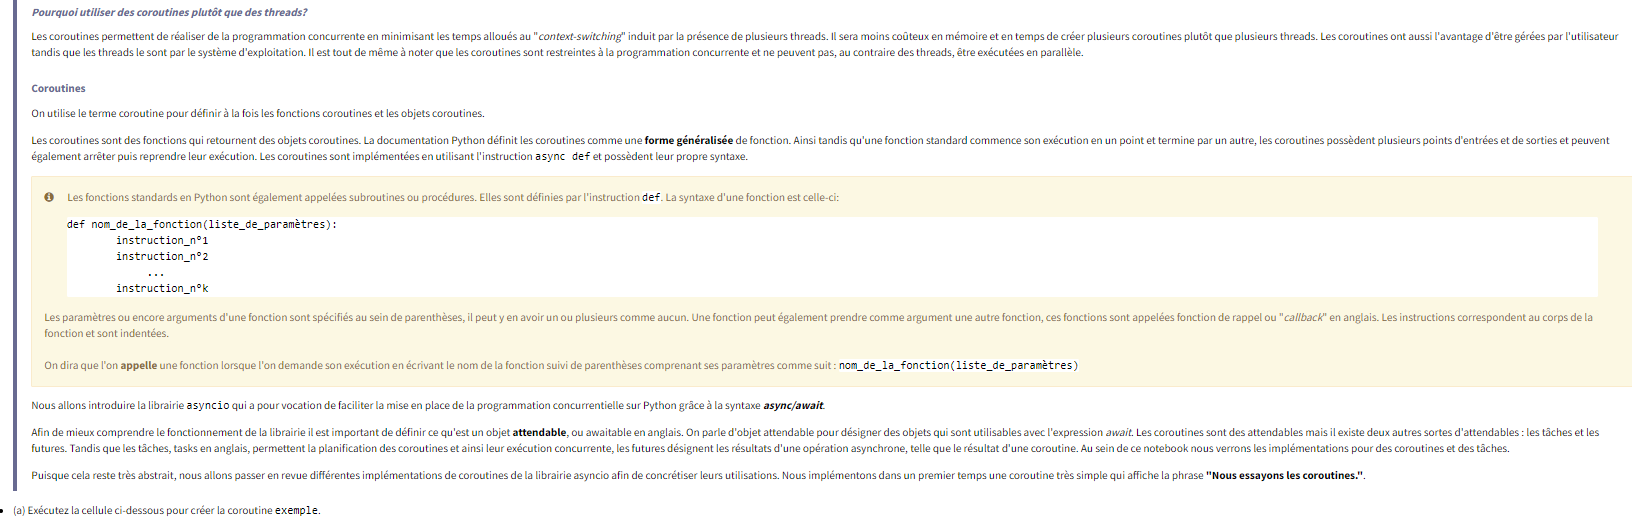

Les coroutines permettent de réaliser de la programmation concurrente en minimisant les temps alloués au "context-switching" induit par la présence de plusieurs threads.   

Il sera moins coûteux en mémoire et en temps de créer plusieurs coroutines plutôt que plusieurs threads. Les coroutines ont aussi l'avantage d'être gérées par l'utilisateur tandis que les threads le sont par le système d'exploitation.   

Il est tout de même à noter que les coroutines sont restreintes à la programmation concurrente et ne peuvent pas, au contraire des threads, être exécutées en parallèle.

In [1]:
# On importe la librairie asyncio et la librairie time

import asyncio
import time

# On crée notre première coroutine

async def exemple():  # On définit la coroutine avec async def

    print("Nous essayons les coroutines.")

Les coroutines ne peuvent pas être appelées de la même façon que les fonctions standards sur Python. Lorsque l'on appelle une coroutine cela retourne un objet coroutine.

(b) Exécutez la cellule ci-dessous pour observer l'objet retourné.

In [2]:
# On appelle la coroutine de la même façon qu'une fonction standard

exemple()

<coroutine object exemple at 0x0000018E8CC130C0>

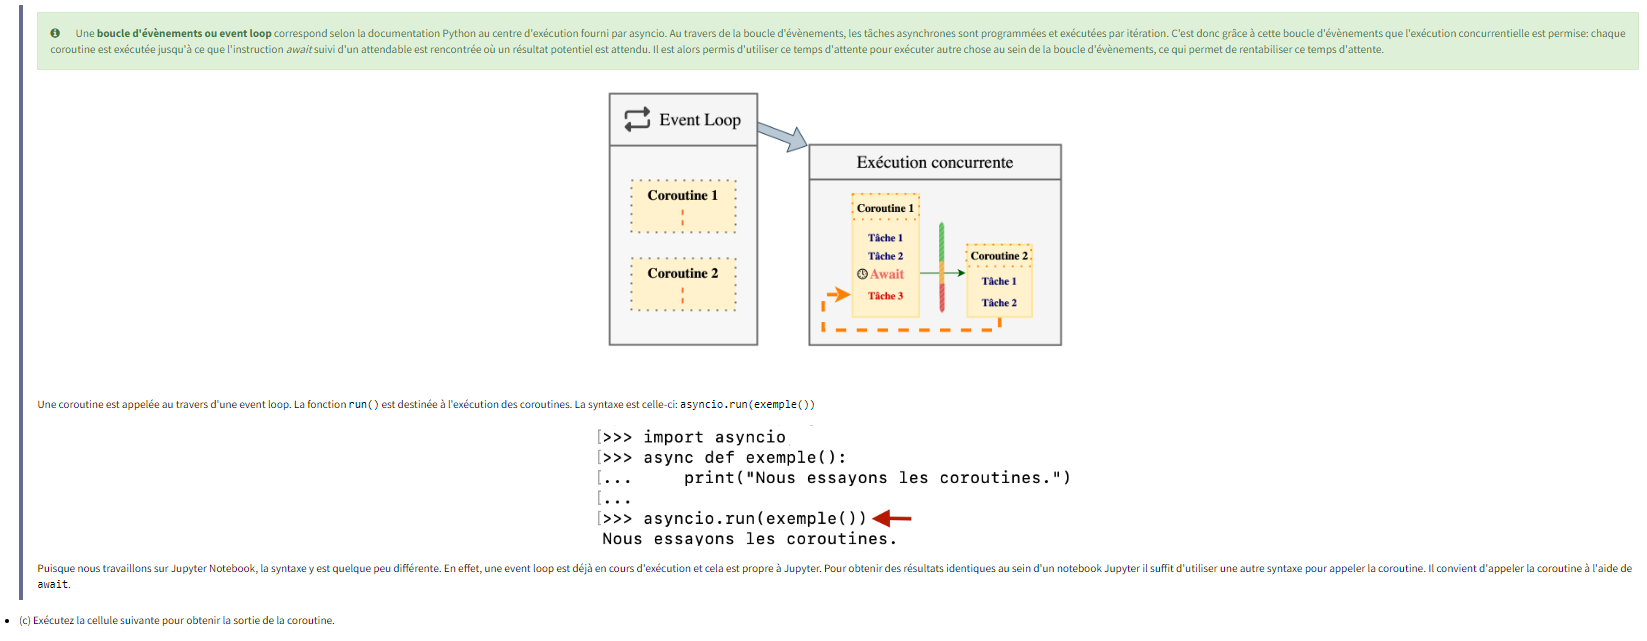

In [3]:
# On appelle la coroutine

await exemple()

Nous essayons les coroutines.


   Toutes les cellules de code qui suivent auront une durée de complétion assez longue (~ 1 minute).
Considérons la fonction sleep de la librairie time et la coroutine sleep de la librairie asyncio, tandis que la première est bloquante, la deuxième est non bloquante. Cela signifie que ce temps d'attente pourra être exploité pour la réalisation d'autres tâches.

Dans la cellule ci-dessous nous implémentons une fonction qui prend en argument un prénom et qui l'affiche après 10 secondes d'attente. Dans la première partie de la cellule nous utilisons des fonctions standards et dans la deuxième des coroutines. Au sein de la coroutine principale main nous appelons la coroutine nom_async(prenom) avec différents arguments au sein de la coroutine gather qui permet l'exécution concurrente des coroutines.

(d) Exécutez la cellule suivante pour comparer la durée de complétion du code entre fonction et coroutine.

In [4]:
# Définition de la fonction nom qui en retour affiche le prénom donné en argument après 10 secondes d'attente
# PROBLEME BLOQUANT DU time.sleep

def nom(prenom):
    name = prenom
    time.sleep(10)
    print(name)

# Définition de la fonction main qui affiche le temps de complétion de l'exécution
# de la fonction nom pour trois arguments différents


def main():
    print("Subroutine :")
    start_time = time.time()
    nom('Daniel')
    nom('Donna')
    nom('Diane')
    end_time = time.time()
    print("Durée totale d'exécution: %.2f secondes" % (end_time - start_time))


main()

Subroutine :
Daniel
Donna
Diane
Durée totale d'exécution: 30.02 secondes


In [5]:
# Définition de la coroutine nom qui en retour affiche le prénom donné en argument après 10 secondes d'attente


async def nom_async(prenom):
    name = prenom
    await asyncio.sleep(10)
    print(name)

# Définition de la coroutine main qui affiche le temps de complétion de l'exécution
# de la fonction nom pour trois arguments différents


async def main():
    print("\nCoroutine :")
    start_time = time.time()
    await asyncio.gather(nom_async('Daniel'), nom_async('Donna'), nom_async('Diane'))
    end_time = time.time()
    print("Durée totale d'exécution: %.2f secondes" % (end_time - start_time))

await main()

# On constate que le temps d'exécution est divisé par trois.


Coroutine :
Daniel
Donna
Diane
Durée totale d'exécution: 10.00 secondes


Il est également possible d'exécuter de façon concurrentielle plusieurs coroutines en créant des tâches comme énoncé plus haut. La syntaxe est décrite dans la cellule suivante. Nous définissons deux fonctions: une fonction nom et une fonction calcul.    

La première affiche le prénom Daniel après un temps d'attente de 10 secondes et la seconde affiche les deux premiers chiffres d'un calcul. Nous procédons comme pour la précédente cellule nous affichons les résultats pour une fonction main standard et pour une coroutine main. Nous exécutons la fonction nom une unique fois et la fonction calcul pour deux arguments différents.

(e) Exécutez la cellule suivante pour comparer la durée de complétion du code entre fonction et coroutine.

In [6]:
# Définition de la fonction name qui en retour affiche le prénom Daniel

def name():
    name = "Daniel"
    time.sleep(10)
    print(name)

# Définition de la fonction calculation qui en retour affiche les deux premiers chiffres d'un calcul


def calculation(x):
    x = x**1000000
    y = int(str(x)[:2])
    print(y)

# Définition de la fonction main qui affiche le temps de complétion de l'exécution
# de la fonction name et de la fonction calculation pour deux arguments différents


def main():
    print("Subroutine :")
    start_time = time.time()
    name()
    calculation(5)
    calculation(3)
    end_time = time.time()
    print("Durée totale d'exécution: %.2f secondes" % (end_time - start_time))


main()

Subroutine :
Daniel
10
17
Durée totale d'exécution: 23.84 secondes


In [7]:
# Définition de la coroutine name_async qui en retour affiche le prénom Daniel


async def name_async():
    name = "Daniel"
    await asyncio.sleep(10)
    print(name)

# Définition de la coroutine calculation_async qui en retour affiche les deux premiers chiffres d'un calcul


async def calculation_async(x):
    x = x**1000000
    y = int(str(x)[:2])
    print(y)

# Définition de la fonction main qui affiche le temps de complétion de l'exécution
# de la fonction name_async et de la fonction calculation_async pour deux arguments différents
# On crée une tâche pour l'exécution de chaque fonction, cela permet de lancer l'exécution de façon concurrente


async def main():
    print("\nCoroutine :")
    start_time = time.time()
    task1 = asyncio.ensure_future(name_async())
    task2 = asyncio.ensure_future(calculation_async(5))
    task3 = asyncio.ensure_future(calculation_async(3))

    await task1
    await task2
    await task3

    end_time = time.time()
    print("Durée totale d'exécution: %.2f secondes" % (end_time - start_time))

await main()

# On constate que le temps d'exécution est divisé par deux.


Coroutine :
10
17
Daniel
Durée totale d'exécution: 12.80 secondes


L'utilisation de la coroutine gather et la création de tâches donnent lieu à des résultats très similaires. La création de tâches soumet chaque coroutine à la boucle d'évènements, ainsi l'on peut créer autant de tâches que l'on souhaite et elles y seront exécutées.    

La différence avec gather réside dans le fait que gather attend la complétion de l'ensemble des coroutines puis retourne leur résultat, ce ne sont plus des tâches individuelles.

3. Exercice d'application 
A partir du code dans la celulle ci-dessous, implémentez des coroutines qui permettent d'obtenir un temps d'exécution inférieur à celui obtenu avec une programmation synchrone et des fonctions standards. A l'aide de l'API wikipédia, nous souhaitons résumer les pages concernant les coroutines, le threading et la programmation concurrente.    

Pour cela, nous implémentons une fonction wiki qui affiche en retour le résumé d'une page wikipédia, l'argument de la fonction. Nous ajoutons au sein de la fonction un temps d'attente.

(f) Exécutez la cellule suivante puis dans la prochaine cellule insérez votre code.

In [8]:
# On importe la librairie wikipedia

import asyncio
import wikipedia
import time

# On définit la langue de prédilection

wikipedia.set_lang("fr")

# On définit une fonction qui retourne le résumé de chaque page et qui a des temps d'attente bloquants


def wiki(page):
    time.sleep(6)
    print('\n', wikipedia.summary(page))

# On définit une fonction main pour lancer la fonction avec différents arguments


def main():

    print("Subroutine :")

    start_time = time.time()  # On démarre la mesure du temps

    wiki("Coroutine")

    wiki("Threading")

    wiki("Programmation_concurrente")

    end_time = time.time()  # On arrête la mesure du temps

    print("\nDurée totale d'exécution: %.2f secondes" %
          (end_time - start_time))

# On appelle la fonction main


main()

Subroutine :

 Dans un programme, une coroutine est une unité de traitement qui s'apparente à une routine, à ceci près que, alors que la sortie d'une routine met fin à la routine, la sortie de la coroutine peut être le résultat d'une suspension de son traitement jusqu'à ce qu'il lui soit signalé de reprendre son cours. La suspension de la coroutine et la reprise de son cours peuvent s'accompagner d'une transmission de données.
Les coroutines permettent de réaliser des traitements basés sur des algorithmes coopératifs comme les itérateurs, les générateurs, des canaux de communication, etc.
D'après Donald Knuth, le terme coroutine fut inventé par Melvin Conway en 1958, alors qu'il travaillait à l'écriture d'un programme assembleur. Plus tard, Conway proposa d'organiser un compilateur en un ensemble de coroutines, ce qui donne la possibilité d'utiliser des chemins différents lors du débogage, et d'utiliser une seule structure en production.

 Hyper-threading (officiellement appelée Hyper-

In [9]:
# On définit une coroutine qui retourne le résumé de chaque page et qui a des temps d'attente non bloquants

import asyncio
import wikipedia
import time

wikipedia.set_lang("fr")


async def wiki_async(page):
    await asyncio.sleep(6)
    print('\n', wikipedia.summary(page))

# On définit la coroutine main pour lancer les coroutines simultanément grâce à la coroutine gather


async def main():

    print("Coroutine :")

    start_time = time.time()  # On démarre la mesure du temps

    await asyncio.gather(wiki_async("Coroutine"), wiki_async("Threading"), wiki_async("Programmation_concurrente"))

    end_time = time.time()  # On arrête la mesure du temps

    print("\nDurée totale d'exécution: %.2f secondes" %
          (end_time - start_time))

# On appelle la coroutine main

await main()

# On constate bien un gain de temps substantiel entre les deux méthodes.

Coroutine :

 Dans un programme, une coroutine est une unité de traitement qui s'apparente à une routine, à ceci près que, alors que la sortie d'une routine met fin à la routine, la sortie de la coroutine peut être le résultat d'une suspension de son traitement jusqu'à ce qu'il lui soit signalé de reprendre son cours. La suspension de la coroutine et la reprise de son cours peuvent s'accompagner d'une transmission de données.
Les coroutines permettent de réaliser des traitements basés sur des algorithmes coopératifs comme les itérateurs, les générateurs, des canaux de communication, etc.
D'après Donald Knuth, le terme coroutine fut inventé par Melvin Conway en 1958, alors qu'il travaillait à l'écriture d'un programme assembleur. Plus tard, Conway proposa d'organiser un compilateur en un ensemble de coroutines, ce qui donne la possibilité d'utiliser des chemins différents lors du débogage, et d'utiliser une seule structure en production.

 Hyper-threading (officiellement appelée Hyper-T

## 4. Conclusion 
Les coroutines sont des implémentations assez efficaces lorsqu'il s'agit de programmation concurrente. Elles permettent en effet d'utiliser les temps d'attente afin de démarrer d'autres instructions et donc d'accélérer le temps de complétion. Assez simples à implémenter, elles peuvent être utilisées à la place des threads ou en combinant les deux. Il faut néanmoins bien garder en tête que les coroutines ne permettent pas d'exécuter du code en parallèle comme le permettent les threads ou les processus.